## Calculating and visualizing vancomycin concentrations
- in Python using a jupyter notebook and matplotlib

#### Dependencies

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

#### Random PK Variables

In [20]:
Dose = 1000 # mgs
t_inf = 1 # hrs
# Ke of 0.100 ~ 105 mL/min CrCl using 1985 Matze eqn
K_e = 0.100 # -> t1_2 = 6.9 hrs 
V_d = 45.5 # L <- 70 * 0.65
tau = 12

## First, the equation for concentration while infusing

1. The `c_inf(t)` ***(concentration while infusing at time t)*** is: 
\\[c_{inf}(t) = \frac{R_0}{CL_{vanco}}(1 - e^{-K_e * t}) \\]

In [19]:
def c_inf(t):
    return R_0 / CL_vanco * (1 - math.exp(-K_e * t))

<blockquote>
- where <code>R_0</code> <em><strong>(Rate)</strong></em> is: 
 \\[R_0 = \frac{Dose}{T_{inf}} \\]
- and <code>CL_vanco</code> <em><strong>(Vancomycin Clearance)</strong></em> is: \\[CL_{vanco} = K_e \times V_d\\]
</blockquote>

In [21]:
R_0 = Dose / t_inf
CL_vanco = K_e * V_d

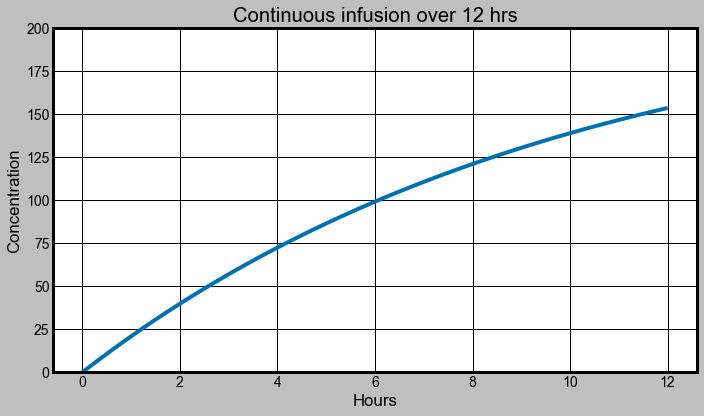

In [78]:
X = np.linspace(0,tau,100) 
Y = [c_inf(t) for t in X]
plt.figure(figsize = (10,6))
plt.plot(X,Y)

plt.title("Continuous infusion over 12 hrs")
plt.style.use(plt.style.available[8])
plt.xlabel("Hours")
plt.ylabel("Concentration")
plt.ylim(0,200)
plt.tight_layout()
plt.savefig("Images/cont_infusion.png")

In [5]:
cmax = R_0 / CL_vanco * (1 - math.exp(-K_e * t_inf))

<blockquote>
* where <code>c_max</code> is the <strong><em>concentration at the end of infusion</strong></em> <code>Tinf = t</code>
\\[c_{max}(t=Tinf) = \frac{R_0}{CL_{vanco}}(1 - e^{-K_e * Tinf}) \\]
</blockquote>

### Second, the equation for concentration after infusion

2. The `c_post(t)` ***(concentration after infusion at time t)*** is: 
\\[c_{post}(t) = c_{max} \times e^{-K_e \times t} \\]

In [62]:
def c_post(t):
    return cmax * math.exp(-K_e * (t - t_inf))

### And finally, determine when we should use either equation  

3. For one dose, if time `t` is less than `Tinf`, we use the infusion equation, if time `t` is greater than `Tinf`, post-infusion equation
    if \\[ t <= t_{inf} \rightarrow c_{inf}(t) \\]
    if \\[ t > t_{inf} \rightarrow c_{post}(t) \\]

In [59]:
def concentration(t):
    if t <= t_inf:
        return c_inf(t)
    else:
        return c_post(t)

In [79]:
def labelPlot():
    plt.xlabel('hrs')
    plt.ylabel('concentration')
    plt.ylim(0,25)
    plt.xlim(0-0.5,tau+0.5)
    plt.title('First-order Concentration Plot')
    
def annotateInterestingPoints():
    plt.annotate(f"Cmax: {cmax:.1f}",xy = (1,cmax),xytext = (-20,20),textcoords ='offset points')
    plt.annotate(f"Cpeak: {cpeak:.1f}",(1+1,cpeak),xytext = (10,25),textcoords ='offset points')
    plt.annotate(f"Ctrough: {ctrough:.1f}",(tau-0.5,ctrough),xytext = (-70,-23),textcoords ='offset points')
    plt.annotate(f"Cmin: {cmin:.1f}",(tau,cmin),xytext = (-65,-40),textcoords ='offset points')

## Now, all we gotta to is plot!

Since plot does not take function,
- sample 250 points along `concentration(t)` function over 24 hrs

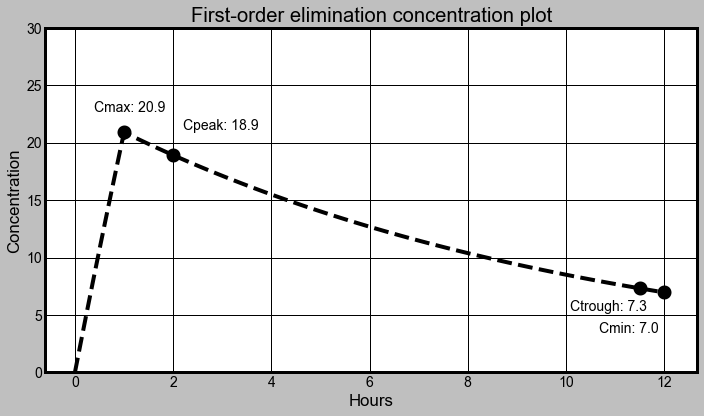

In [86]:
X = np.linspace(0,12,100) 
Y = [concentration(t) for t in X]
plt.figure(figsize = (10,6))

plt.plot(X,Y,'--k')

#interesting points
cmax = concentration(1)
cpeak = concentration(1+1) # <~ wait 1? hr after infusion
ctrough = concentration(tau-0.5) # <~ 30 min before next dose
cmin = concentration(tau)
plt.scatter(x=[1,1+1,tau-0.5,tau],y=[cmax,cpeak,ctrough,cmin],linewidths=8,c='k')

#annotate points
plt.annotate(f"Cmax: {cmax:.1f}",xy = (1,cmax),xytext = (-30,20),textcoords ='offset points')
plt.annotate(f"Cpeak: {cpeak:.1f}",(1+1,cpeak),xytext = (10,25),textcoords ='offset points')
plt.annotate(f"Ctrough: {ctrough:.1f}",(tau-0.5,ctrough),xytext = (-70,-23),textcoords ='offset points')
plt.annotate(f"Cmin: {cmin:.1f}",(tau,cmin),xytext = (-65,-40),textcoords ='offset points')

#stylize plot
plt.style.use(plt.style.available[8])
plt.title("First-order elimination concentration plot")
plt.xlabel("Hours")
plt.ylabel("Concentration")
plt.ylim(0,30)
plt.tight_layout()
plt.savefig("Images/onedose.png")